In [6]:
# Read crime data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = './crime data/crime2.txt'
data = pd.read_csv(data_path, sep='\t')

# delete the incomplete data with nan
crime_data = data.dropna()

indicator_var_names = ['elecyear', 'governor', 'term2', 'term3', 'term4', ]
discrete_covariate_names = ['city', 'state', 'censdist', 'year', 'sworn', 
                             ]
continuous_covariate_names = ['rincpc', 'econgrow', 'unemp', 'citypop', 
                              'a0_5', 'a5_9', 'a10_14', 'a15_19', 'a20_24', 'a25_29',
                             'citybla', 'cityfemh', 'sta_educ', 'sta_welf', 'price', 'termlim']
crime_types = ['murder', 'rape', 'robbery', 'assault', 'burglary', 'larceny', 'auto']
# crime_data.loc[:,'murder_rate'] = (crime_data.loc[:,'murder'] / crime_data.loc[:,'citypop'])
for crime_type in crime_types:
    crime_data[f'{crime_type}_rate'] = (crime_data[crime_type] / crime_data['citypop'])
# print(crime_data['murder_rate'])
# print(crime_data[crime_types])

/var/folders/hf/mvtqnhss2m78nl53_v_g7m3h0000gn/T/ipykernel_17622/3283467451.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data[f'{crime_type}_rate'] = (crime_data[crime_type] / crime_data['citypop'])
/var/folders/hf/mvtqnhss2m78nl53_v_g7m3h0000gn/T/ipykernel_17622/3283467451.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data[f'{crime_type}_rate'] = (crime_data[crime_type] / crime_data['citypop'])
/var/folders/hf/mvtqnhss2m78nl53_v_g7m3h0000gn/T/ipykernel_17622/3283467451.py:22: Set

Text(0.5, 0.98, 'Rate of Different Crime between 1970 and 1990.')

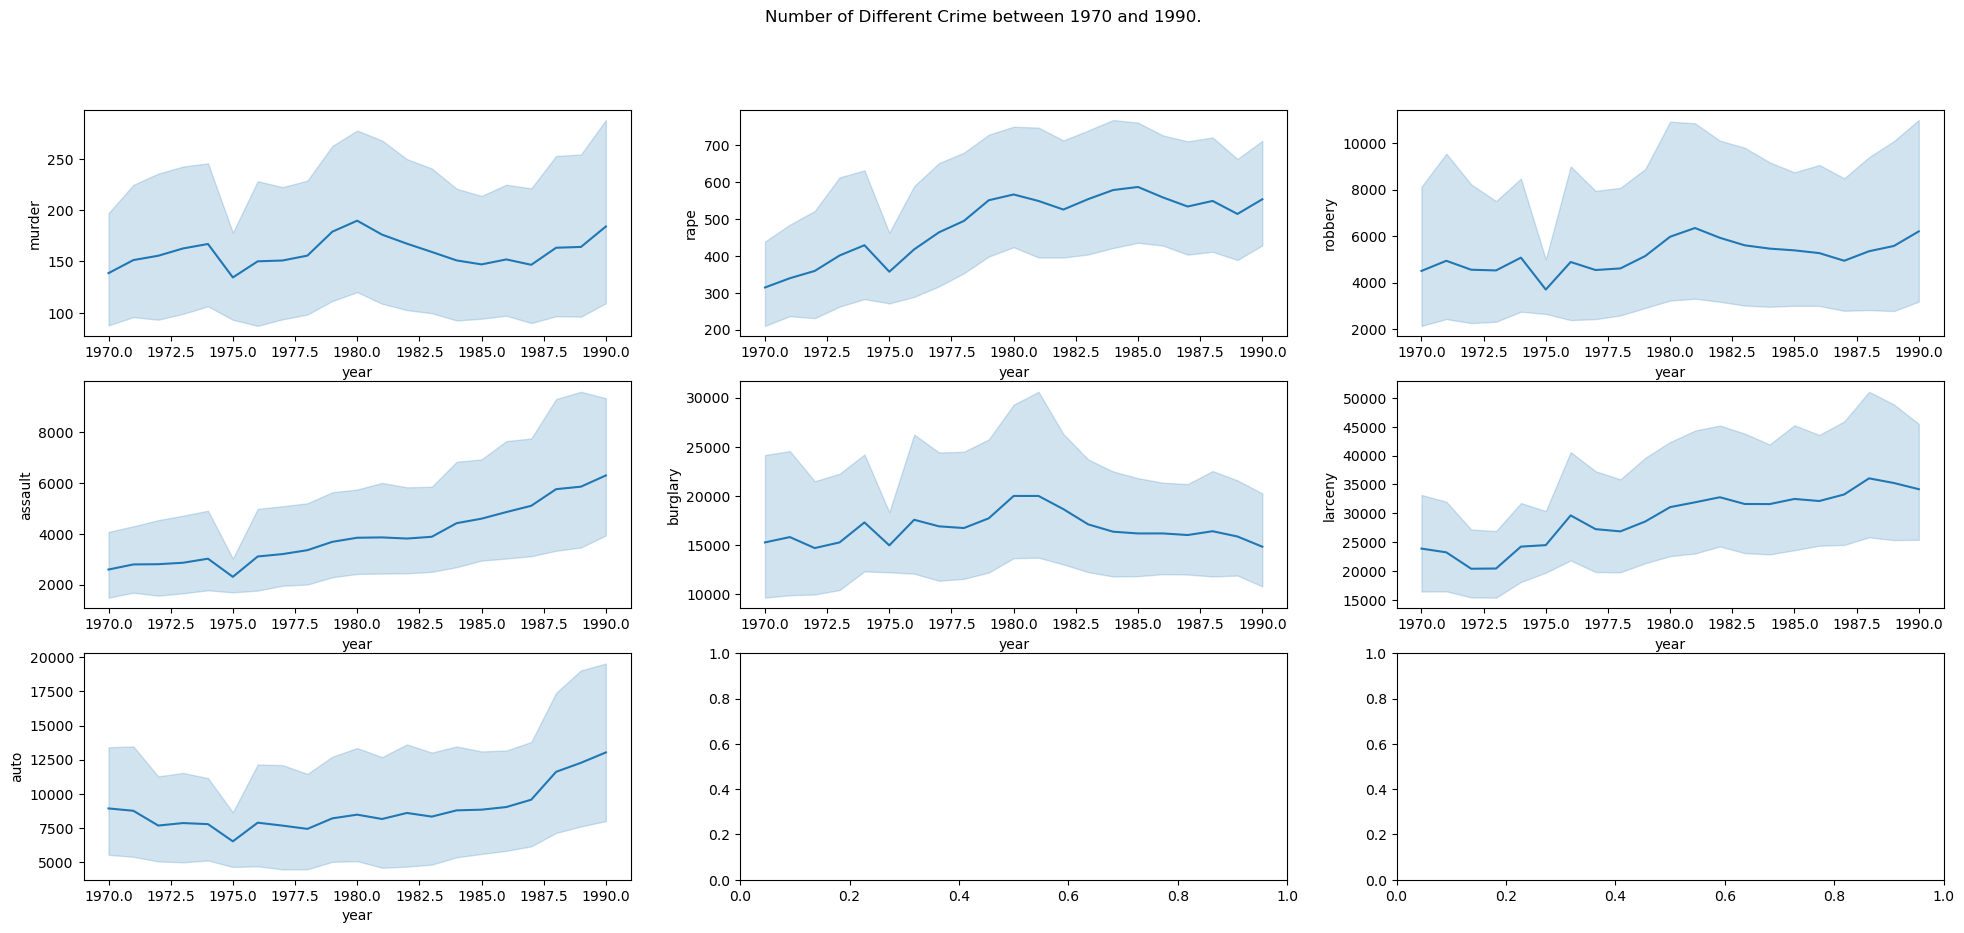

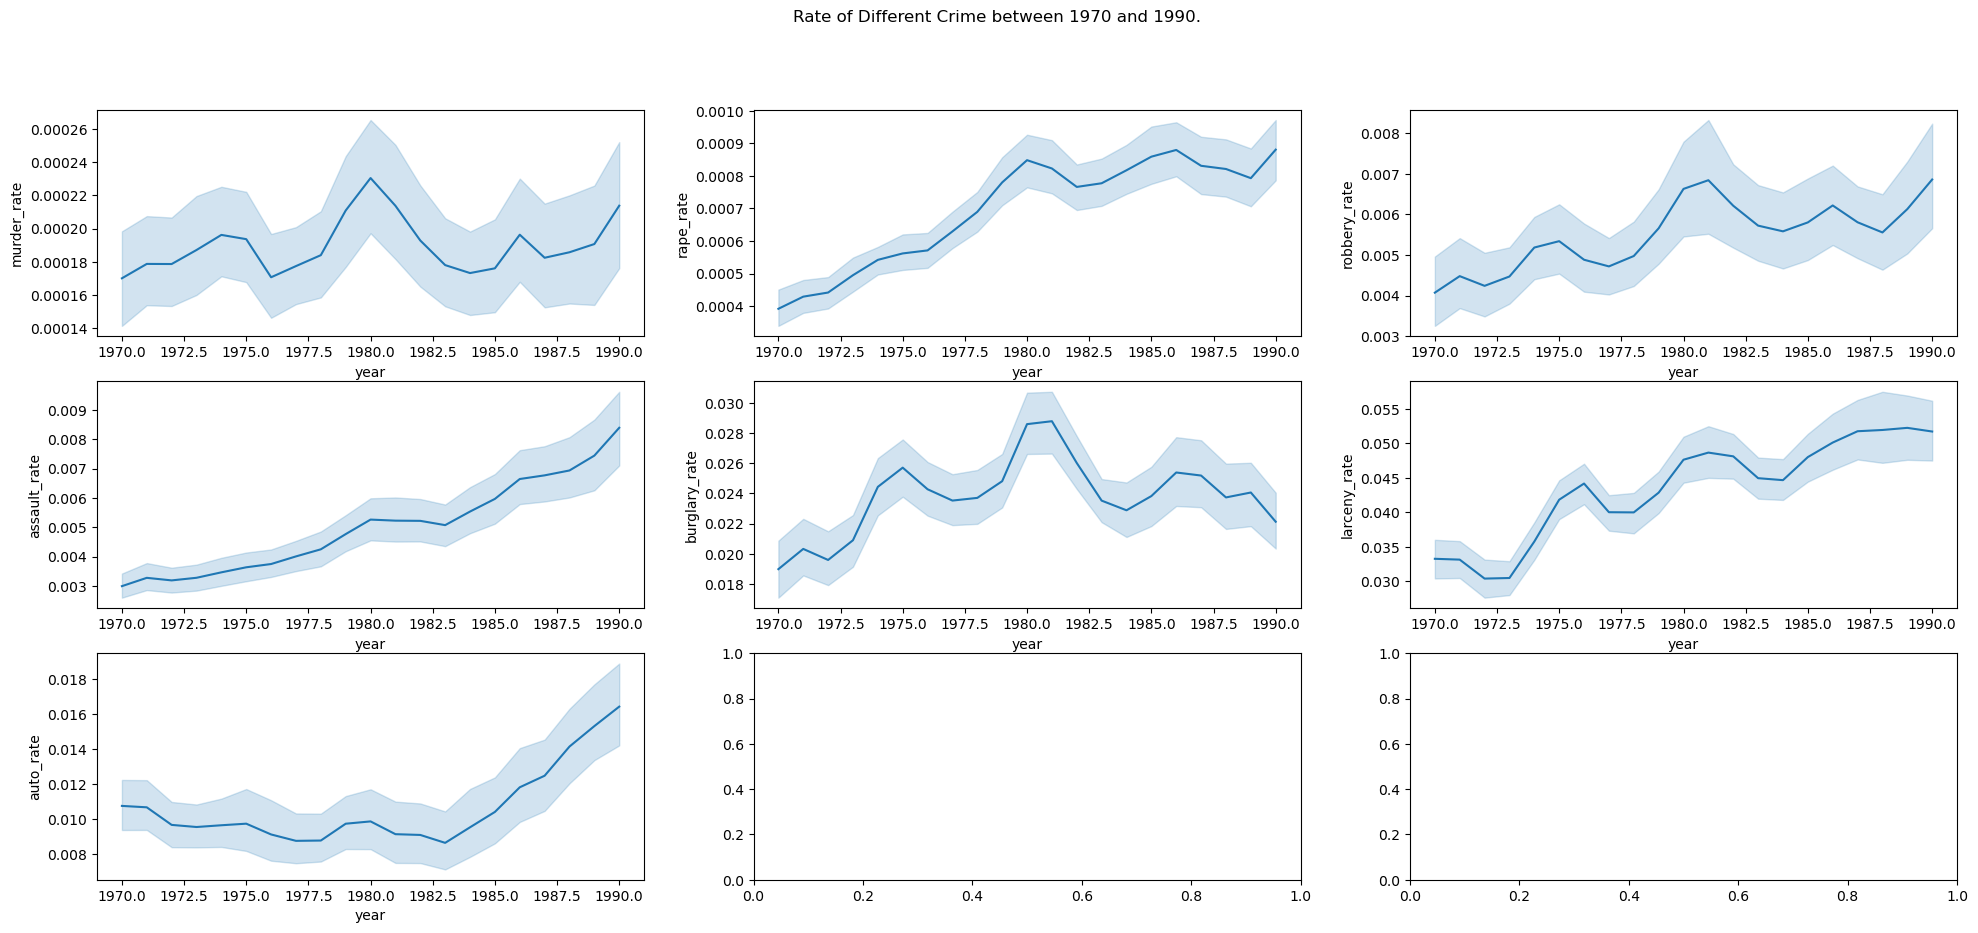

In [32]:
# analysis the data first, mean std or other statistical results,
# trends box-line plot
# Number Plot
fig, axes = plt.subplots(3, 3, figsize=(24,10))

for k, crime_type in enumerate(crime_types):
    i, j = k // 3, k % 3
    sns.lineplot(ax=axes[i, j], data=crime_data, x='year', y=crime_type,)
fig.suptitle('Number of Different Crime Events between 1970 and 1990.')

# Rate Plot
fig, axes = plt.subplots(3, 3, figsize=(24,10))

for k, crime_type in enumerate(crime_types):
    i, j = k // 3, k % 3
    sns.lineplot(ax=axes[i, j], data=crime_data, x='year', y=f'{crime_type}_rate',)
fig.suptitle('Rate of Different Crime Events between 1970 and 1990.')
# g = sns.PairGrid(crime_data, x_vars=['year'], y_vars=crime_types)
# g.map(sns.lineplot)
# sns.lineplot(data=crime_data, x='year', y='murder',)



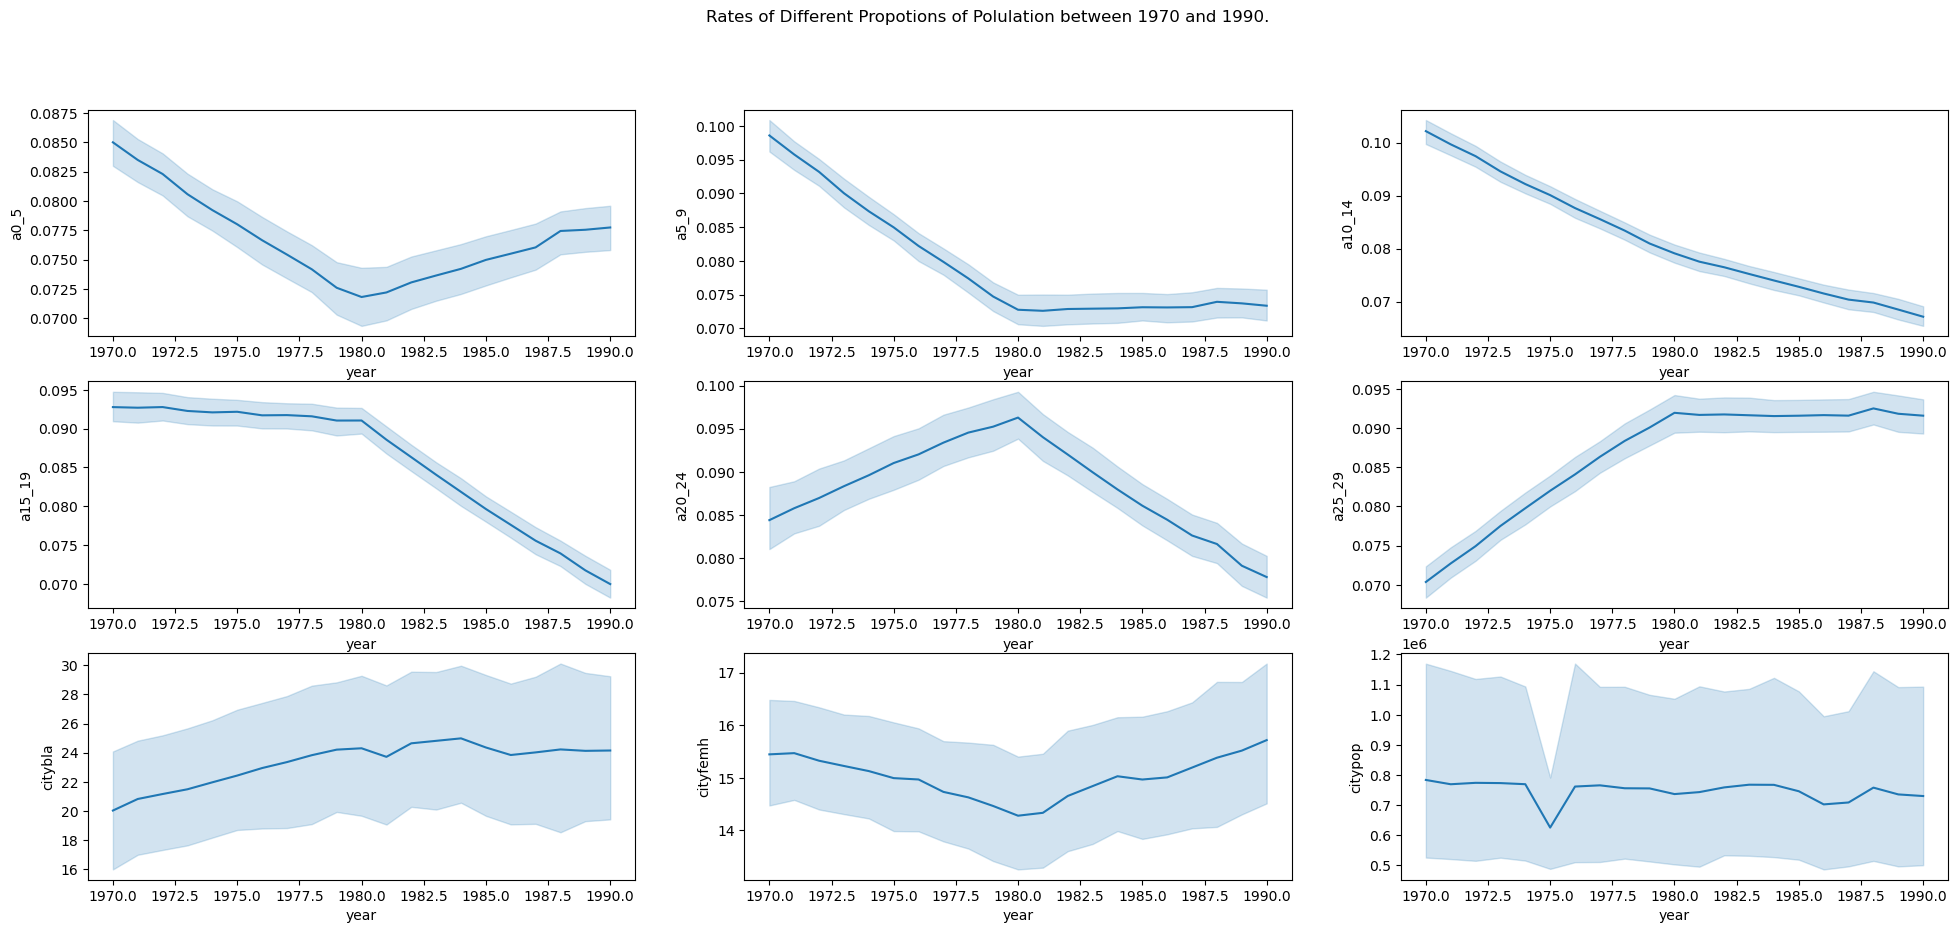

In [90]:
# parts of population analysis
fig, axes = plt.subplots(3, 3, figsize=(24,10))

parts = ['a0_5', 'a5_9', 'a10_14', 'a15_19', 'a20_24', 'a25_29', 'citybla', 'cityfemh', 'citypop']

for k, part in enumerate(parts):
    i, j = k // 3, k % 3
    sns.lineplot(ax=axes[i, j], data=crime_data, x='year', y=part,)
fig.suptitle('Rates of Different Propotions of Polulation between 1970 and 1990.')

plt.savefig('./figures/ages_parts.png')

We can find that both the numbers and the rates of almost all kinds of crime events have rising trend as time goes on. So the increasing of the number of crime events are not only caused by the increasing of the city populations. There must be some other factors affect the number of crime events which we want to investigate in the further study.

['murder', 'rape', 'robbery', 'assault', 'burglary', 'larceny', 'auto']
['elecyear', 'governor', 'term2', 'term3', 'term4'] ['murder', 'rape', 'robbery', 'assault', 'burglary', 'larceny', 'auto']
['city', 'state', 'censdist', 'year', 'sworn'] ['murder', 'rape', 'robbery', 'assault', 'burglary', 'larceny', 'auto', 'elecyear', 'governor', 'term2', 'term3', 'term4']
['rincpc', 'econgrow', 'unemp', 'citypop', 'a0_5', 'a5_9', 'a10_14', 'a15_19', 'a20_24', 'a25_29', 'citybla', 'cityfemh', 'sta_educ', 'sta_welf', 'price', 'termlim'] ['murder', 'rape', 'robbery', 'assault', 'burglary', 'larceny', 'auto', 'elecyear', 'governor', 'term2', 'term3', 'term4', 'city', 'state', 'censdist', 'year', 'sworn']
['murder', 'rape', 'robbery', 'assault', 'burglary', 'larceny', 'auto', 'elecyear', 'governor', 'term2', 'term3', 'term4', 'city', 'state', 'censdist', 'year', 'sworn', 'rincpc', 'econgrow', 'unemp', 'citypop', 'a0_5', 'a5_9', 'a10_14', 'a15_19', 'a20_24', 'a25_29', 'citybla', 'cityfemh', 'sta_educ

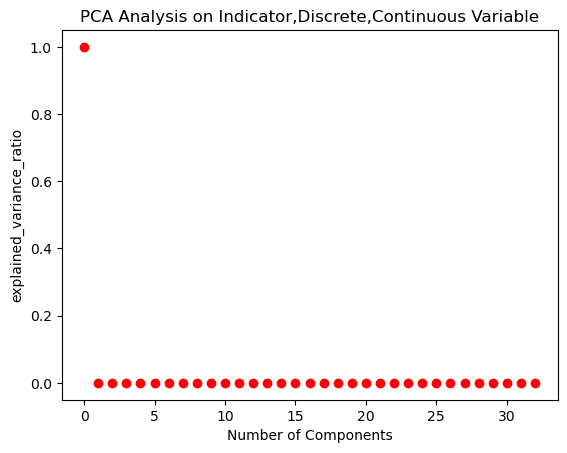

In [85]:
# PCA analysis or feature selection
GROUPS = {
    'dis': (discrete_covariate_names, 'Discrete'),
    'con': (continuous_covariate_names, 'Continuous'),
    'ind': (indicator_var_names, 'Indicator')
}
choosed_groups = ['ind','dis', 'con']
choosed_factors = crime_types
for g in choosed_groups:
    choosed_factors = choosed_factors + GROUPS[g][0] # indicator_var_names + continuous_covariate_names + discrete_covariate_names
print(choosed_factors)
x = crime_data[choosed_factors].to_numpy().T
print('Crime data Shape:', x.shape)

# x: R^{p x n} -> R^{21, 1078}
p, n = x.shape

# (b) compute the sample mean \hat{\mu_{n}} and form \tilde{X} = X - e \hat{\mu_{n}^T}
x_mean = x.mean(axis=1)
x_tilde = x - x_mean.reshape(p, 1)

# (c) compute top k SVD of \tilde{X} = US_kV^{T}
u, s, vh = np.linalg.svd(x_tilde)

# (d) Plot eigenvalue curve 
x_cov = (1/n) * np.matmul(x_tilde, x_tilde.T)
trace_cov = np.trace(x_cov)
e_val, e_vec = np.linalg.eig(x_cov)
print(e_val, trace_cov)
plt.plot(e_val/trace_cov, 'ro')
choosed_tag = ','.join([GROUPS[g][1] for g in choosed_groups])
plt.title(f'PCA Analysis on {choosed_tag} Variable')  # Discrete and Continuous Indicator
plt.xlabel('Number of Components')
plt.ylabel('explained_variance_ratio')
choosed_fig_tag = '_'.join(choosed_groups)
plt.savefig(f'./figures/crim_{choosed_fig_tag}.png')



(1, 33) (array([0]),) [[3.51555059e+07 4.08942966e+05 2.31209845e+05 1.65007169e+05
  9.35075227e+04 5.89329926e+04 2.02093412e+04 5.83320944e+03
  4.35938223e+03 2.41409605e+03 1.73606032e+03 6.66386783e+02
  6.14849239e+02 4.24972987e+02 3.43665457e+02 1.59862357e+02
  5.39882425e+01 3.28168769e+01 1.68701211e+01 1.45663201e+01
  1.23035172e+01 1.17253133e+01 5.16823895e+00 1.10973118e+00
  8.07593783e-01 5.38936954e-01 3.36785538e-01 2.75783804e-01
  1.56445082e-01 9.47443793e-02 5.12546366e-02 3.84764004e-02
  3.33526511e-09]]
[0.001 0.09  0.074 0.909 0.928 0.677 0.99  0.918 0.867 0.958 0.951 0.904
 0.348 0.558 0.684 0.61  0.094 0.069 0.053 0.185 0.15  0.194 0.548 0.748
 0.581 0.064 0.149 0.966 0.373 0.405 0.804 0.633 0.506]
[0, 1, 1, 1, 1, 1, 2, 4, 5, 6, 7, 7, 7, 7, 7, 9, 9, 9, 9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 16, 17, 17, 18, 18, 18, 19, 19, 20, 20, 20, 20, 20, 22, 22,

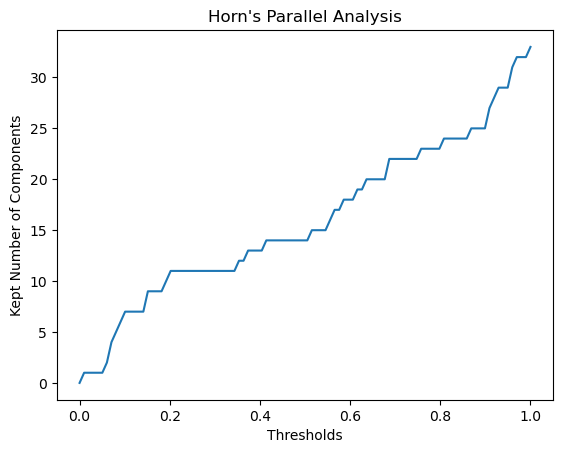

In [93]:
# horn's parallel analysis

def perumtated_lambdas(x):
    permutation = np.random.permutation(x.shape[1])
    x_permutated = x[:, permutation]
    u, s, vh = np.linalg.svd(x_permutated)
    return s

x = crime_data[choosed_factors].to_numpy().T
p, n = x.shape
x_mean = x.mean(axis=1)
x_tilde = x - x_mean.reshape(p, 1)

R = 1000
lambdas = []
u, s, vh = np.linalg.svd(x_tilde)
ori_lambdas = s
for i in range(R):
    lambdas.append(perumtated_lambdas(x_tilde))
lambdas = np.stack(lambdas)  # R x p
pvals = np.mean(lambdas > ori_lambdas.reshape(1, -1), axis=0)
lambda_idxs = np.where(pvals < 0.05)
kept_lambdas = lambdas[lambda_idxs]
print(kept_lambdas.shape, lambda_idxs, kept_lambdas)
kept_nums = []

# Line plot
print(pvals)
thresholds = np.linspace(0, 1, 100)
for threshold in thresholds:
    tmp_lambda_idxs = np.where(pvals < threshold)
    kept_nums.append(len(tmp_lambda_idxs[0]))
print(kept_nums)
plt.plot(thresholds, kept_nums)
plt.title(f'Horn\'s Parallel Analysis')  # Discrete and Continuous Indicator
plt.xlabel('Thresholds')
plt.ylabel('Kept Number of Components')
plt.savefig(f'./figures/horn.png')



['city', 'state', 'censdist', 'year', 'sworn', 'rincpc', 'econgrow', 'unemp', 'citypop', 'a0_5', 'a5_9', 'a10_14', 'a15_19', 'a20_24', 'a25_29', 'citybla', 'cityfemh', 'sta_educ', 'sta_welf', 'price', 'termlim']


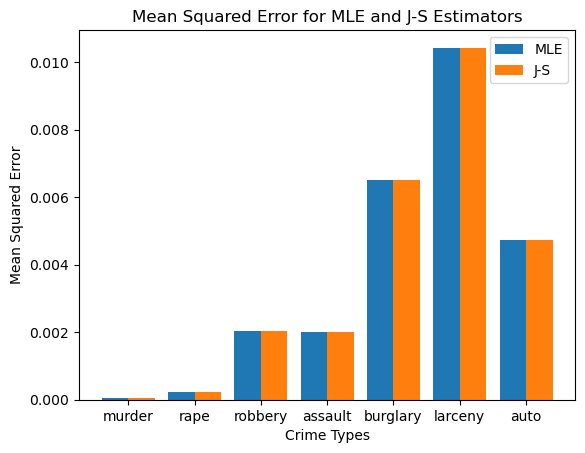

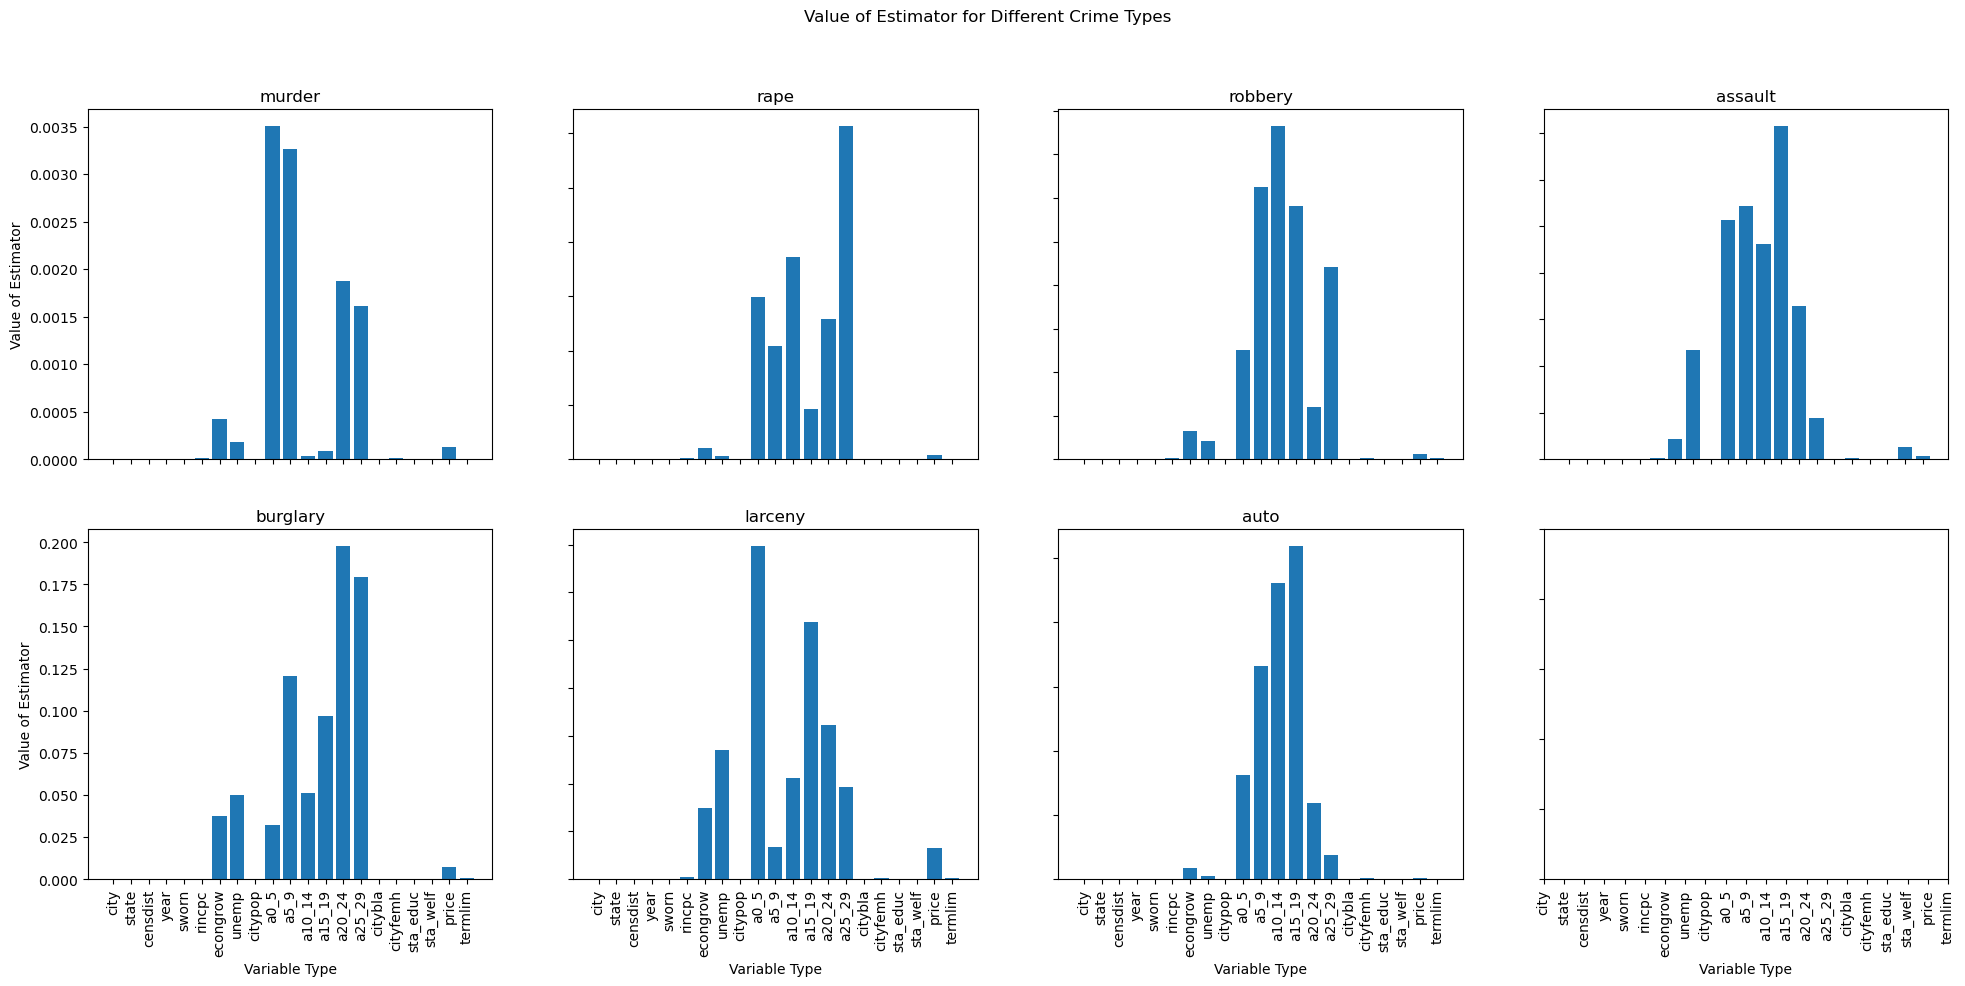

In [55]:
# JS-Estimator
import numpy as np
import matplotlib.pyplot as plt

def mle_estimator(X, Y, weight_decay=0):
    return np.linalg.inv(X.T @ X + weight_decay * np.eye(X.shape[1])) @ X.T @ Y

def sigma2_hat(X, Y, beta):
    # X : n x p, Y: n x 1, beta: p x 1
    # also a mse loss
    return np.mean((Y - X @ beta)**2)
    
def js_estimator(X, Y):
    n, p = X.shape
    mle_beta = mle_estimator(X, Y)
    sigma2_estimate = sigma2_hat(X, Y, mle_beta)
    js_beta = mle_beta * (1 - (p - 2) * sigma2_estimate / (mle_beta.T @ X.T @ X @ mle_beta))
    return js_beta

np.random.seed(2023)

GROUPS = {
    'dis': (discrete_covariate_names, 'Discrete'),
    'con': (continuous_covariate_names, 'Continuous'),
    'ind': (indicator_var_names, 'Indicator')
}
choosed_groups = ['dis', 'con']
choosed_factors = []
for g in choosed_groups:
    choosed_factors = choosed_factors + GROUPS[g][0] # indicator_var_names + continuous_covariate_names + discrete_covariate_names
print(choosed_factors)
num_cv = 10
results = {crime_type:{'mle':{'beta':[], 'mse':[]}, 'js':{'beta':[], 'mse':[]}} for crime_type in crime_types}
for crime_type in crime_types:
# crime_type = 'murder'
    X = crime_data[choosed_factors].to_numpy() # n x p
    Y = crime_data[f'{crime_type}_rate'].to_numpy().reshape(-1, 1)
    for cv_idx in range(num_cv):
        n, p = X.shape
        n_train = n // num_cv * 9
        random_idxs = np.random.permutation(n)
        train_idxs = random_idxs[:n_train]
        test_idxs = random_idxs[n_train:]
        X_train, Y_train  = X[train_idxs, :], Y[train_idxs, :]
        X_test, Y_test = X[test_idxs, :], Y[test_idxs, :]

        # mle
        mle_beta = mle_estimator(X_train, Y_train)
        js_beta = js_estimator(X_train, Y_train)

        mle_mse = np.sqrt(sigma2_hat(X_test, Y_test, mle_beta))
        js_mse = np.sqrt(sigma2_hat(X_test, Y_test, js_beta))

        results[crime_type]['mle']['beta'].append(mle_beta)
        results[crime_type]['mle']['mse'].append(mle_mse)
        results[crime_type]['js']['beta'].append(js_beta)
        results[crime_type]['js']['mse'].append(js_mse)

# mse bar plot
mle_mse_means = []
js_mse_means = []
for crime_type in crime_types:
    mle_mse_means.append(np.mean(results[crime_type]['mle']['mse']))
    js_mse_means.append(np.mean(results[crime_type]['js']['mse']))
    
crime_axis = np.arange(len(crime_types))
plt.bar(crime_axis - 0.2, mle_mse_means, 0.4, label='MLE')
plt.bar(crime_axis + 0.2, js_mse_means, 0.4, label='J-S')
plt.xticks(crime_axis, crime_types)
plt.xlabel('Crime Types')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for MLE and J-S Estimators')
plt.legend()
plt.savefig('./figures/mle_js_mse_noind.png')
    
# beta bar plot   
mle_beta_means = []
js_beta_means = []
for crime_type in crime_types:
    mle_beta_means.append(np.mean(np.stack(results[crime_type]['mle']['beta']), axis=0))
    js_beta_means.append(np.mean(np.stack(results[crime_type]['js']['beta']), axis=0))

fig, axes = plt.subplots(2, 4, figsize=(24, 10))
for k, crime_type in enumerate(crime_types):
    mle_beta = mle_beta_means[k].reshape(-1)
    i, j = k // 4, k % 4
    beta_axis = np.arange(len(mle_beta))
    axes[i,j].bar(beta_axis, np.abs(mle_beta))
    axes[i,j].set_title(crime_type)
for ax in axes.flat:
    ax.set(xlabel='Variable Type', ylabel='Value of Estimator')
    ax.set_xticks(beta_axis, choosed_factors, rotation=90)
    ax.label_outer()

plt.suptitle('Value of Estimator for Different Crime Types')

plt.savefig('./figures/mle_beta_noind.png')




In [ ]:
# MSE-Estimator, Lasso, LBI